In [8]:
###Importing Neccessary modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [9]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
# Exploring the training datasets, it should print the shape of the images datasets and the label of the datasets.
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [63]:
train_images[150]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  19, 221, 254,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [62]:
len(train_images)

60000

In [ ]:
# thorough view of the 

In [11]:
# Exploring the testing  dataset, it should print the shape of the images datasets and the label of the datasets.
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [45]:
# WHile still exploring the datasets, this count the unique classes classified in the datasets
# It also print the label of the classes
class_labels = np.unique(train_labels)
print(f"There are {len(class_labels)} classes in the dataset. They are: {class_labels}")

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


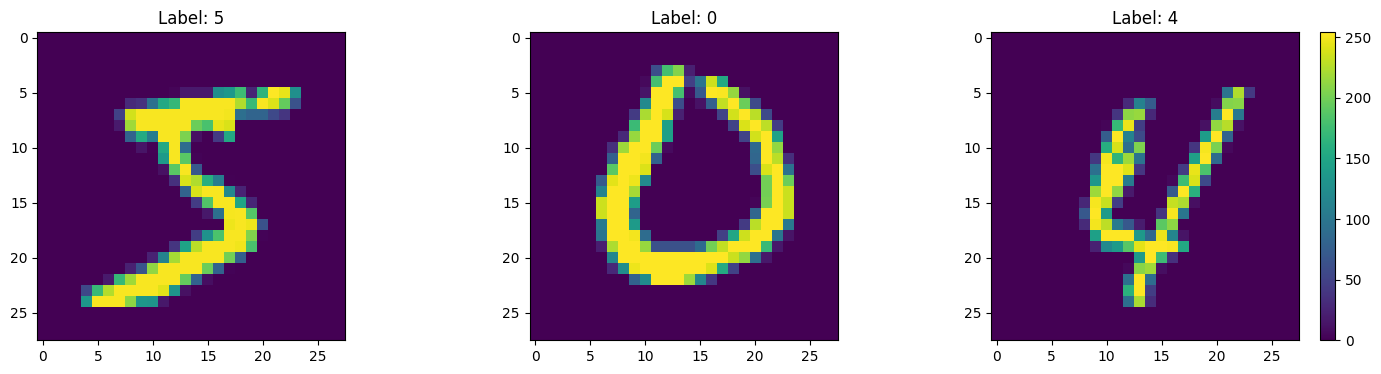

In [13]:
#Plotting the datasets to see some of the data point 
# This determines the size of the shapes
plt.figure(figsize=(18, 4))

# A subplot here, a datapoint

# Syntax is plt.subplot(num_rows, num_cols, plot_index)
plt.subplot(1,3,1) 
plt.imshow(train_images[0]) #datapoint of index 0 from the train_images datasets is called on
plt.title("Label: {}".format(train_labels[0]))

#Another datapoint for another subplot
plt.subplot(1,3,2)
plt.imshow(train_images[2500]) #datapoint of index 2500 from the train_images datasets is called on
plt.title("Label: {}".format(train_labels[2500]))

#Another datapoint for another subplot
plt.subplot(1,3,3)
plt.imshow(train_images[700]) #datapoint of index 2500 from the train_images datasets is called on
plt.title("Label: {}".format(train_labels[700]))
plt.colorbar()
#Now to show my graph
plt.show()

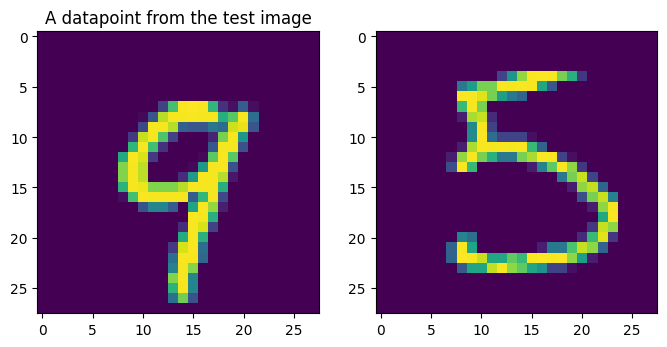

In [37]:
#Viewing some testing data element

plt.figure(figsize=(8,4))

#Ploting a datapoint for another subplot

# Syntax is plt.subplot(num_rows, num_cols, plot_index)
plt.subplot(1,2,1)
plt.imshow(test_images[12]) #datapoint of index 12 from the test_images datasets is called on
plt.title("A datapoint from the test image")

#Another datapoint for another subplot
plt.subplot(1,2,2)
plt.imshow(test_images[15]) #datapoint of index 12 from the test_images datasets is called on

# Now to show our plot
plt.show()

In [20]:
# After all this, next is to scale our dataset, 
# i.e make every datapoint value range between a value to another value

# Since our datapoint ranges from [0,255], scaling makes it range from 0 to 1.
# The reason is to get better flow when using our code in building the neural netowork
# SO, we do this by dividing by the highest number in the range which is 255
# Say we have a datapoin which is 10, we then say, 10/255 which equates to 0.392156827
# With that, weve scaled that
# So, lets do same for all of them

# Just for last view, we would notice that the the train_images plotted above above, the scale by the side ranges from 0 to 255
# so now, after our scaling here, it would range from 0 to 1. Let Seeee!!!!!!

# For training dataset stored into the train_image variable
train_images_scaled = train_images / 255.0

# For testing dataset stored into the test_image variable
test_images_scaled = test_images / 255.0


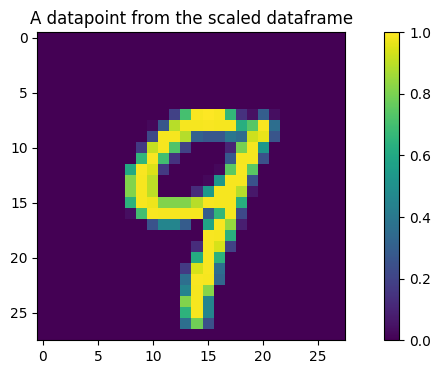

In [38]:
# wants to plot again after scaling

plt.figure(figsize=(10,4))


plt.subplot(1,1,1)
plt.imshow(test_images_scaled[12]) 
plt.colorbar()
plt.title("A datapoint from the scaled dataframe")

plt.show()

As noticed above, the range of the colours now range from 0.0 to 1.0, meaning that, in the excel file, those variables in one data point that have values between 0 to 255 now have 0 to 1 because we scaled it.
Now, whats the reason for those value, well, they determine the colour of a pixel in the dark purple to yellow which helped form the numerical figures in the documentation

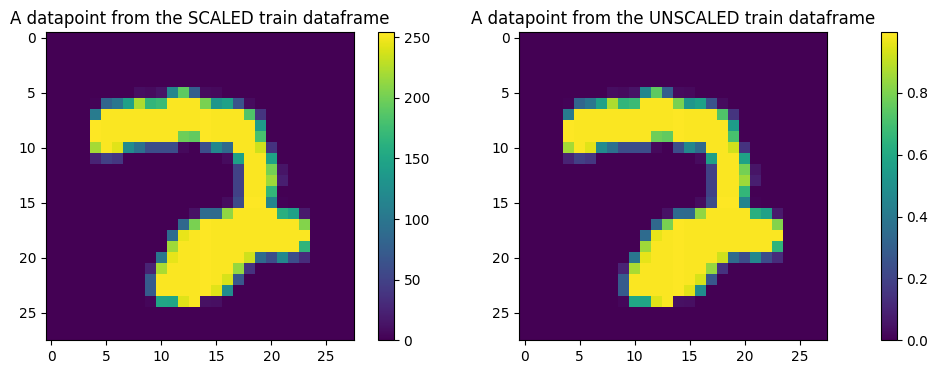

In [41]:
# Now, lets try to print a datapoint from the scaled dataframe and the dataframe we didn't scaled and print both with their scale

# wants to plot again after scaling

#plt.figure(figsize=(10,4)#)


plt.figure(figsize=(14,4))

plt.subplot(1,1,1)
plt.imshow(train_images_scaled[120]) 
plt.colorbar()
plt.title("A datapoint from the UNSCALED train dataframe")

plt.subplot(1,2,1)
plt.imshow(train_images[120]) 
plt.colorbar()
plt.title("A datapoint from the SCALED train dataframe")

#TO plot the graphs
plt.show()

From the above, the ranges are different.

### Next is to split the train scaled dataset, into the test and validation i.e x_train, x_val, y_train, y_val so i can insert it into my model

The Validation splitted data here is to evaluate performance of model while its training, the evaluation helps in maling decisions about stopping the training process, it acts as a proxy for unseen data. 

In [42]:
x_train = train_images[0:50000] # independent variables to train the model.
x_val = train_images[50000:] # independent variables to validate the model after training.
y_train = train_labels[0:50000] # Dependent variable to validate the model after training
y_val = train_labels[50000:] # dependent variables to validate the model during  training

In [43]:
# lets print the shape of our divided datasets
print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [58]:
x_train[1000].shape

(28, 28)

In [59]:
x_train[1000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  36, 146, 254, 255, 251,  95,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#From above, i can see that the x_train and x_val dataset have 3 dimension, i.e (50000, 28, 28) and (10000,28,28) respectively
# i now need to convert this into 2 shapes

In [46]:
# Next is to categorize our dataset into the number of label
# Since our dataset contains numbers from 0 to 10, meaning we have 10 labels

from tensorflow.keras.utils import to_categorical # this will help categorize our dataset into num of provided labels

no_of_labels = 10
y_train = to_categorical(y_train, no_of_labels)
y_test = to_categorical(test_labels, no_of_labels)
y_val = to_categorical(y_val, no_of_labels)


In [51]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
y_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [54]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)